# Table of Contents
 <p><div class="lev1 toc-item"><a href="#NetHack's-functions-Rne,-Rn2-and-Rnz-in-Python-3" data-toc-modified-id="NetHack's-functions-Rne,-Rn2-and-Rnz-in-Python-3-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>NetHack's functions Rne, Rn2 and Rnz in Python 3</a></div><div class="lev2 toc-item"><a href="#Rn2-distribution" data-toc-modified-id="Rn2-distribution-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><code>Rn2</code> distribution</a></div><div class="lev2 toc-item"><a href="#Rne-distribution" data-toc-modified-id="Rne-distribution-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span><code>Rne</code> distribution</a></div><div class="lev2 toc-item"><a href="#Rnz-distribution" data-toc-modified-id="Rnz-distribution-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span><code>Rnz</code> distribution</a></div><div class="lev2 toc-item"><a href="#Examples" data-toc-modified-id="Examples-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Examples</a></div><div class="lev3 toc-item"><a href="#For-x=350" data-toc-modified-id="For-x=350-141"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>For <code>x=350</code></a></div><div class="lev2 toc-item"><a href="#Conclusion" data-toc-modified-id="Conclusion-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Conclusion</a></div>

# NetHack's functions Rne, Rn2 and Rnz in Python 3

I liked [this blog post](https://eev.ee/blog/2018/01/02/random-with-care/#beware-gauss) by [Eevee](https://eev.ee/blog/).
He wrote about interesting things regarding random distributions, and linked to [this page](https://nethackwiki.com/wiki/Rnz) which describes a weird distribution implemented as `Rnz` in the [NetHack](https://www.nethack.org/) game.

> Note: I never heard of any of those before today.

I wanted to implement and experiment with the `Rnz` distribution myself.
Its code ([see here](https://nethackwiki.com/wiki/Source:NetHack_3.6.0/src/rnd.c#rnz)) uses two other distributions, `Rne` and `Rn2`.

In [41]:
%load_ext watermark
%watermark -v -m -p numpy,matplotlib

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.6.3
IPython 6.2.1

numpy 1.13.3
matplotlib 2.1.1

compiler   : GCC 7.2.0
system     : Linux
release    : 4.13.0-21-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [39]:
import random
import numpy as np
import matplotlib.pyplot as plt

## `Rn2` distribution

[The `Rn2` distribution](https://nethackwiki.com/wiki/Rn2) is simply an integer uniform distribution, between $0$ and $x-1$.

In [19]:
def rn2(x):
    return random.randint(0, x-1)

In [20]:
np.asarray([rn2(10) for _ in range(100)])

array([1, 1, 9, 9, 0, 1, 9, 3, 1, 2, 7, 8, 6, 8, 3, 8, 4, 8, 6, 9, 7, 2, 2,
       0, 9, 0, 7, 5, 0, 9, 4, 1, 1, 9, 2, 7, 3, 7, 4, 7, 3, 2, 0, 2, 8, 2,
       0, 2, 0, 0, 7, 9, 9, 2, 7, 4, 9, 4, 3, 7, 9, 3, 3, 1, 2, 6, 6, 5, 5,
       4, 0, 8, 9, 8, 1, 9, 5, 5, 9, 0, 6, 9, 5, 3, 1, 8, 4, 5, 8, 6, 9, 7,
       9, 4, 1, 2, 0, 0, 9, 0])

Testing for `rn2(x) == 0` gives a $1/x$ probability :

In [32]:
from collections import Counter

In [35]:
Counter([rn2(10) == 0 for _ in range(100)])

Counter({False: 91, True: 9})

In [36]:
Counter([rn2(10) == 0 for _ in range(1000)])

Counter({False: 894, True: 106})

In [37]:
Counter([rn2(10) == 0 for _ in range(10000)])

Counter({False: 9000, True: 1000})

## `Rne` distribution

[The `Rne` distribution]() is a truncated geometric distribution.

In [88]:
def rne(x, truncation=5):
    truncation = max(truncation, 1)
    tmp = 1
    while tmp < truncation and rn2(x) == 0:
        tmp += 1
    return tmp

> In the NetHack game, the player's experience is used as default value of the `truncation` parameter...

In [89]:
np.asarray([rne(3) for _ in range(50)])

array([3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1,
       2, 1, 2, 1, 4, 2, 1, 1, 1, 4, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 3, 1, 1,
       2, 1, 1, 2])

(array([ 6610.,  2268.,   747.,   252.,   123.]),
 array([ 1. ,  1.8,  2.6,  3.4,  4.2,  5. ]),
 <a list of 5 Patch objects>)

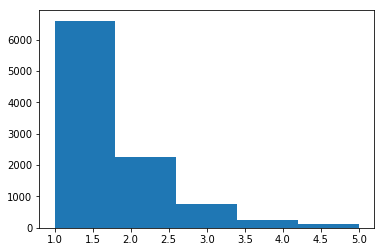

In [90]:
plt.hist(np.asarray([rne(3) for _ in range(10000)]), bins=5)

In [91]:
np.asarray([rne(4, truncation=10) for _ in range(50)])

array([2, 1, 1, 3, 1, 2, 4, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 6, 1, 2, 1,
       1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 4])

(array([  7.51300000e+03,   1.88900000e+03,   4.38000000e+02,
          0.00000000e+00,   1.12000000e+02,   3.80000000e+01,
          0.00000000e+00,   9.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([ 1. ,  1.7,  2.4,  3.1,  3.8,  4.5,  5.2,  5.9,  6.6,  7.3,  8. ]),
 <a list of 10 Patch objects>)

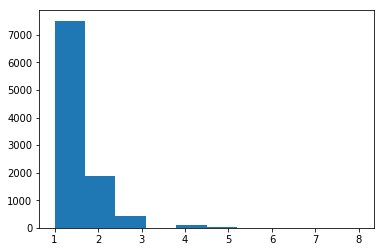

In [92]:
plt.hist(np.asarray([rne(4, truncation=10) for _ in range(10000)]), bins=10)

Let's check what [this page](https://nethackwiki.com/wiki/Rnz#Probability_density_function) says about `rne(4)`:

> The rne(4) call returns an integer from 1 to 5, with the following probabilities:
>
> |Number| Probability |
> |:-----|------------:|
> | 1 | 3/4 |
> | 2 | 3/16 |
> | 3 | 3/64 |
> | 4 | 3/256 |
> | 5 | 1/256 | 

In [96]:
ref_table = {1: 3/4, 2: 3/16, 3: 3/64, 4: 3/256, 5: 1/256}
ref_table

{1: 0.75, 2: 0.1875, 3: 0.046875, 4: 0.01171875, 5: 0.00390625}

In [99]:
N = 100000
table = Counter([rne(4, truncation=5) for _ in range(N)])
for k in table:
    table[k] /= N
table = dict(table)
table

{1: 0.7498, 2: 0.18791, 3: 0.04641, 4: 0.0117, 5: 0.00418}

In [111]:
rel_diff = lambda x, y: abs(x - y) / x
for k in ref_table:
    x, y = ref_table[k], table[k]
    r = rel_diff(x, y)
    print(f"For k={k}: relative difference is {r:.3g} between {x:.3g} (expectation) and {y:.3g} (with N={N} samples).")

For k=1: relative difference is 0.000267 between 0.75 (expectation) and 0.75 (with N=100000 samples).
For k=2: relative difference is 0.00219 between 0.188 (expectation) and 0.188 (with N=100000 samples).
For k=3: relative difference is 0.00992 between 0.0469 (expectation) and 0.0464 (with N=100000 samples).
For k=4: relative difference is 0.0016 between 0.0117 (expectation) and 0.0117 (with N=100000 samples).
For k=5: relative difference is 0.0701 between 0.00391 (expectation) and 0.00418 (with N=100000 samples).


> Seems true !

## `Rnz` distribution

It's not too hard to write.

In [112]:
def rnz(i, truncation=10):
    x = i
    tmp = 1000
    tmp += rn2(1000)
    tmp *= rne(4, truncation=truncation)
    flip = rn2(2)
    if flip:
        x *= tmp
        x /= 1000
    else:
        x *= 1000
        x /= tmp
    return int(x)

## Examples

In [113]:
np.asarray([rnz(3) for _ in range(100)])

array([ 5,  2,  1,  1,  2,  5,  3,  0,  3,  2,  2,  5,  5,  3,  0,  1,  3,
        4,  4,  1,  4,  2,  6,  4,  3,  3,  8,  2,  3,  5,  2,  4,  1,  4,
        4,  2,  4,  1,  1,  3,  1,  2,  0,  5,  1,  2,  5, 14,  2,  1,  0,
        1,  5, 17,  2,  3,  1,  1,  1,  4, 13,  1,  4,  4,  2,  5,  5,  1,
        2,  0,  4,  4,  0,  5, 20,  6,  2,  3,  5,  2,  1,  3,  2,  5,  0,
        2,  5,  1,  4,  2,  1,  1,  2,  2, 11,  2,  1,  5,  5,  1])

In [114]:
np.asarray([rnz(3, truncation=10) for _ in range(100)])

array([ 6,  5,  5,  5,  2, 16,  2,  1,  3,  2,  5,  3,  2,  5,  0,  4,  2,
        2,  4,  3, 10,  4,  5,  1,  1,  2,  5, 10,  1,  1,  0,  5,  4,  5,
        1,  7, 16,  1,  3,  5,  3,  1, 11,  2, 10,  9,  4,  1,  8,  4,  1,
        1,  4,  0,  2,  5,  2,  2,  7,  2, 10,  2,  7,  5,  1, 10,  2,  4,
        3,  1,  1,  6, 10,  2,  2,  0,  4,  1,  4,  3,  1,  4,  3,  2,  3,
        5,  1,  5,  0,  1,  2, 10,  5,  1,  3,  2,  1,  2,  1,  1])

### For `x=350`

In [115]:
np.asarray([rnz(350) for _ in range(100)])

array([ 668,  511,  360, 1548,  211,  495,  321,  180,  667, 1339,  179,
        257,  696,  192,  211,  134,  312,  164,  202,  206,  299,  316,
        182,  566,  445,  392,  363,  592,  656,  605,  676,  287,  704,
       1190,  253,  118,  359,  142,  331,  586,  597,  204,  196,   60,
        178, 1605,  606,  692,  187,  486,  696,  624,  182,  322,  260,
        580, 1283,  100,  663,   89,  465,  305,  420,  436,  500,   93,
        178,  348,  489,  499,  227, 1143,  187,  220,  513,  193, 1270,
        461,  299,  323,  679,  729, 1301,  910,  509, 1006, 2071, 1575,
        183,   44,  229,  119,  515,  327,   87,  281,  638,  177,  208,
        114])

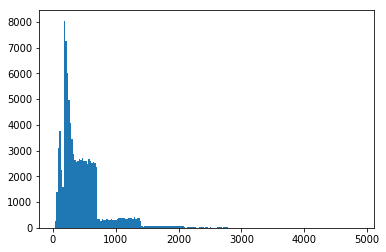

In [122]:
_ = plt.hist(np.asarray([rnz(350) for _ in range(100000)]), bins=200)

In [78]:
np.asarray([rnz(350, truncation=10) for _ in range(100)])

array([1288,   58,   27, 2349, 4723, 2011, 1767, 2200, 1685,   19, 2873,
         66,  884, 1517,  159, 2758, 4657,  957,  225,   32, 2626,  176,
       1000,  737, 2353,   50,  928,   67,   52, 1543,  229,   34, 3725,
         75,  163, 2431, 3307,  460, 2144, 1411,  108,  131, 2447, 1170,
       2024,   32,  431,   98,  489, 2417,  210, 5569,  963,  132,  479,
        195, 3752,  257, 4429, 1219,  446,  153,  619,   18,  105,  144,
       1520,   40, 2608,  260,  412, 1755, 1057,   99,   64,  322, 1981,
        112,  146,   53,   56, 1270, 1808, 4517, 1598,   79, 1355, 6954,
       2075, 3458,   64, 1061,  176,  474, 1309, 3260, 4118,   19,  260,
        872])

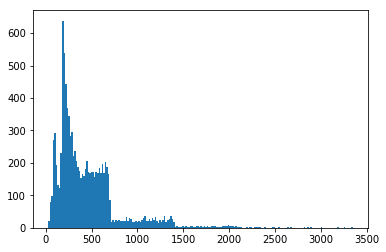

In [120]:
_ = plt.hist(np.asarray([rnz(350, truncation=10) for _ in range(10000)]), bins=200)

## Conclusion
That's it, not so interesting but I wanted to write this.